In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *
import pandas as pd


from gp_fijando_operaciones import *

In [2]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


**Parámetros**

In [3]:
funcdict = {
	'add' : 5,
	'sub' : 5,
	'mul' : 4,
	'div' : 4,
	'inv' : 1,
	'log' : 3,
	'max' : 1,
	'min' : 1,
	'sqrt' : 2,
	'exp' : 1,
	'floor': 2
}

#gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
#res = gp.execute(x,y, generations=100)
#res

gp_fijando_operaciones = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
res = gp_fijando_operaciones.execute(x,y, generations=100)
res

c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\gp_fijando_operaciones.py:11: RuntimeWarning: overflow encountered in power
  return np.average(np.power(y-y_pred,2), weights=w)
Progress:  17%|█▋        | 17/100 [00:15<01:06,  1.25it/s]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: invalid value encountered in subtract
  return self.operator(*args)
Progress:  33%|███▎      | 33/1

**Mejor fitness con y sin penalización**

In [ ]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	2.268633403044459
best fitness penalizado:	2.417264525923962


In [ ]:
#(res["best_trees"][0]).pprint()

**Gráfica árbol**

In [ ]:
(res["best_trees"][-1]).pprint()


  div_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 /                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
#arbol = "div(x,log(sub(mul(div(inv(log(inv(log(0.4981859242141673)))),mul(inv(log(0.4981859242141673)),log(log(inv(0.4981859242141673))))),log(x)),div(x,div(inv(log(inv(0.4981859242141673))),mul(inv(log(inv(0.4981859242141673))),log(0.7107532914770232)))))))"
#sympy.sympify(arbol,locals=SYMPY_FUNC_CONVERTER)
#arbol.sympify_str()

**Ecuación**

In [ ]:
print(res['best_trees'][-1])

div(x,log(mul(add(add(mul(add(mul(mul(mul(mul(x,0.8347677556448827),0.8347677556448827),0.8347677556448827),0.8347677556448827),sqrt(mul(mul(add(mul(mul(mul(mul(x,0.8347677556448827),0.8347677556448827),0.8347677556448827),0.8347677556448827),sqrt(mul(mul(mul(mul(mul(x,0.8347677556448827),0.8347677556448827),0.8347677556448827),0.7741665314239266),0.8347677556448827))),0.8347677556448827),0.8347677556448827))),0.8347677556448827),sqrt(sqrt(x))),max(div(mul(add(1.6478018204426175,0.9015839422890164),0.973463470958511),log(1.0904463972468343)),log(x))),0.8347677556448827)))


**Gráficos**

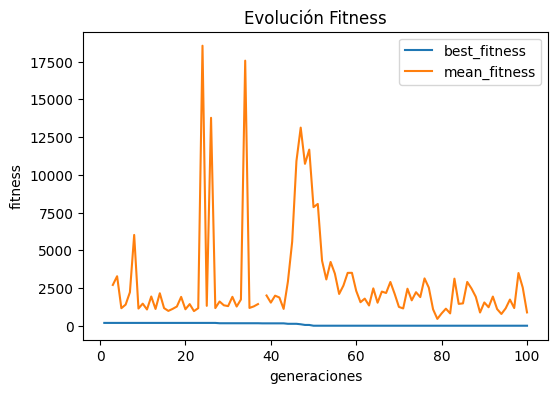

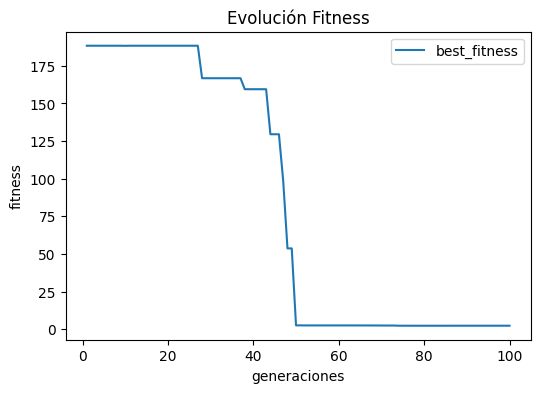

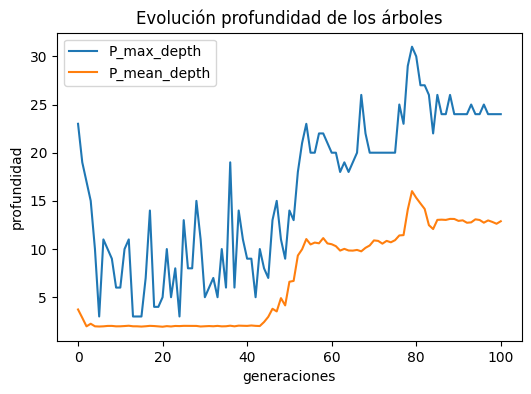

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()